Imports

In [1]:
from Bio import SeqIO
from Bio.PDB import *
import numpy as np
import itertools
import os
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Help functions

In [2]:
d = 1

def init_matrix(x, y):
    f = np.zeros((len(x) + 1, len(y) + 1), int)
    for i in range(len(x) + 1):
        f[i][0] = -i * d
    for i in range(len(y) + 1):
        f[0][i] = -i * d
    return f

def g(x, y, matrix, letters):
    lines = matrix.split('\n')
    toks = lines[letters[x] + 1].split()
    return int(toks[letters[y] + 1])

def global_alignment(x, y, matrix, letters):
    f = init_matrix(x, y)
    p = np.zeros((len(x), len(y)), str)
    for i in range(1, len(x) + 1, 1):
        for j in range(1, len(y) + 1, 1):
            match = f[i - 1][j - 1] + g(x[i - 1], y[j - 1], matrix, letters)
            delete = f[i - 1][j] - d
            insert = f[i][j - 1] - d
            max_v = max(match, insert, delete)
            if max_v == delete:
                p[i - 1][j - 1] = "d"
            elif max_v == insert:
                p[i - 1][j - 1] = "i"
            else:
                p[i - 1][j - 1] = "m"
            f[i][j] = max_v
    return (f[-1][-1], p)

def seqFromPDB(file):
    seq = []
    pdb_file = open(file, "r")
    pdb = pdb_file.read()
    lines = pdb.split('\n')
    for line in lines:
        toks = line.split()
        if len(toks) < 1: continue
        if toks[0] != 'ATOM': continue
        else: seq.append(toks[3])
    return seq

Load matrices

In [3]:
letters1 = {'A': 0,'Y': 1,'B': 2,'C': 3, 'D': 4 ,'E' : 6,'F': 5,'H': 7,'G': 8,
           'I' : 9,'L' : 10, 'K' : 11,'N' : 12,'T' : 13,'P' : 14,'S' : 15,'W' : 16,'X' : 17,
           'V' : 18,'M' : 19, 'R' : 20, 'Q' : 21, 'Z' : 22, '*' : 23}

letters2 = {'A': 0,'R': 1,'N': 2,'D': 3, 'C': 4 ,'Q' : 6,'E': 5,'G': 7,'H': 8,
           'I' : 9,'L' : 10, 'K' : 11,'M' : 12,'F' : 13,'P' : 14,'S' : 15,'T' : 16,'W' : 17,
           'Y' : 18,'V' : 19, 'B' : 20, 'X' : 21, 'X' : 22, '*' : 23}

file = open("SASM", "r")
first = file.read()
file.close()

file = open("BLOSUM62", "r")
second = file.read()
file.close()

Load fasta

In [4]:
prots_structure = []
for record in SeqIO.parse("sequences.fasta", "fasta"):
    prots_structure.append(record)

Load pdb

In [5]:
files = [os.path.join(os.getcwd(), 'proteins', filename) for filename in os.listdir(os.path.join(os.getcwd(), 'proteins'))]
            
prots_residues = []
for file in files:
    for record in SeqIO.parse(file, "pdb-atom"):
        prots_residues.append(record.seq)

In [6]:
score_structure = []
for subset in itertools.combinations(prots_structure, 2):
    score, p = global_alignment(subset[0], subset[1], first, letters1)
    score_structure.append(score)

In [7]:
score_residues = []
for subset in itertools.combinations(prots_residues, 2):
    score, p = global_alignment(subset[0], subset[1], second, letters2)
    score_residues.append(score)

In [8]:
scipy.stats.pearsonr(score_structure, score_residues)

(0.9273034538562791, 5.792597723360995e-20)

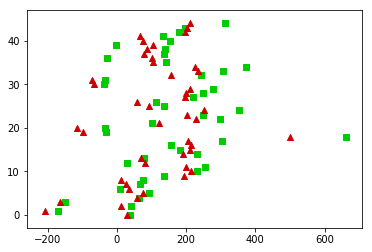

In [9]:
y = list(range(len(score_structure)))
plt.scatter(score_structure, y, marker='s', c='#00cc00');
plt.scatter(score_residues, y, marker='^', c='#cc0000');